Выбор модели определения биологического возраста

In [1]:
from llamba_library.bioage_model import BioAgeModel
from txai_omics_3.models.tabular.widedeep.ft_transformer import WDFTTransformerModel, FN_SHAP, FN_CHECKPOINT, TRAIN_DATA_PATH

fn_model = FN_CHECKPOINT
model = WDFTTransformerModel.load_from_checkpoint(fn_model)
bioage_model = BioAgeModel(model=model)

Lightning automatically upgraded your loaded checkpoint from v1.6.4 to v2.1.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint H:\Lobachevsky\txai_omics_3\data\immuno\model.ckpt`
h:\Lobachevsky\llamba\llamba_env\Lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


Определение SHAP-значений

In [2]:
import pandas as pd
import torch
from llamba_library.functions import get_shap_dict
import numpy as np

my_data = {'CXCL9': 2599.629474, 
           'CCL22': 820.306524, 
           'IL6': 0.846377, 
           'PDGFB': 13400.666359, 
           'CD40LG': 1853.847406, 
           'IL27': 1128.886982,
           'VEGFA': 153.574220,
           'CSF1': 239.627236,
           'PDGFA': 1005.844290,
           'CXCL10': 228.229829,
           'Age': 90.454972 }

data = pd.DataFrame(my_data, index=[0])

def predict_func(x):
    batch = {
        'all': torch.from_numpy(np.float32(x)),
        'continuous': torch.from_numpy(np.float32(x)),
        'categorical': torch.from_numpy(np.int32(x[:, []])),
    }
    return model(batch).cpu().detach().numpy()
shap_dict = get_shap_dict(FN_SHAP)

Визуализация вклада отдельных признаков в оценку биологического возраста

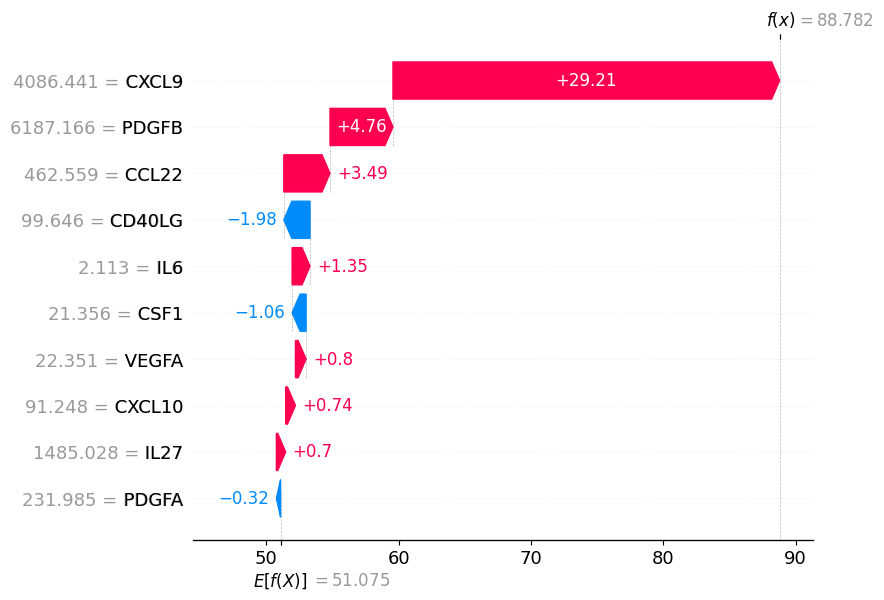

In [3]:
import shap
import llamba_library.plots as bplt

feats = [
    'CXCL9',
    'CCL22',
    'IL6',
    'PDGFB',
    'CD40LG',
    'IL27',
    'VEGFA',
    'CSF1',
    'PDGFA',
    'CXCL10'
]
explainer = shap_dict['explainer']
df = pd.read_excel(TRAIN_DATA_PATH, index_col=0)

bplt.shap_plot(explainer=explainer, feats=feats, target="trn_val_000", data=df)